In [5]:
!python --version

Python 3.8.6


In [3]:
!module load torchvision/0.9.1-fosscuda-2020b-PyTorch-1.8.1

In [34]:
!pip install rioxarray
import rioxarray

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/apps/Alvis/software/Python/3.8.6-GCCcore-10.2.0/bin/python3.8 -m pip install --upgrade pip' command.


In [2]:
!pip install rasterio

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/apps/Alvis/software/Python/3.8.6-GCCcore-10.2.0/bin/python3.8 -m pip install --upgrade pip' command.


In [5]:
!pip install torchvision

Defaulting to user installation because normal site-packages is not writeable
  Using cached torch-1.10.2-cp38-cp38-manylinux1_x86_64.whl (881.9 MB)
You should consider upgrading via the '/apps/Alvis/software/Python/3.8.6-GCCcore-10.2.0/bin/python3.8 -m pip install --upgrade pip' command.


In [2]:
!module spider torchvision
!module load torchvision/0.9.1-fosscuda-2020b-PyTorch-1.8.1


----------------------------------------------------------------------------
  torchvision:
----------------------------------------------------------------------------
    Description:
      Datasets, Transforms and Models specific to Computer Vision

     Versions:
        torchvision/0.7.0-fosscuda-2019b-Python-3.7.4-PyTorch-1.6.0
        torchvision/0.8.2-fosscuda-2020b-PyTorch-1.7.1
        torchvision/0.9.1-fosscuda-2020b-PyTorch-1.8.1

----------------------------------------------------------------------------
  For detailed information about a specific "torchvision" package (including how
 to load the modules) use the module's full name.
  Note that names that have a trailing (E) are extensions provided by other modu
les.
  For example:

     $ module spider torchvision/0.9.1-fosscuda-2020b-PyTorch-1.8.1
----------------------------------------------------------------------------

 
m--More--

In [1]:
import numpy as np
import rasterio as rio
from rasterio.plot import show
import tensorflow as tf
import matplotlib.pyplot as plt
import torch
#import torchvision


In [3]:
%matplotlib inline

In [3]:
src = rio.open("/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei/DatasetAfricaPoverty/TenYears/Geo0/0000000224-0000020384.tif")
image_numpy = src.read()
image = tf.convert_to_tensor(image_numpy, dtype=tf.float32)


#train_dataset = tf.data.Dataset.list_files("/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei/DatasetAfricaPoverty/TenYears/Geo0/0000000224-0000020384.tif", seed=50)
#train_dataset = train_dataset.map(parse_image)

In [18]:
tf.shape(image)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([ 80, 224, 224], dtype=int32)>

In [19]:
rgb_1 = image[0:3]
np.shape(rgb_1)

TensorShape([3, 224, 224])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


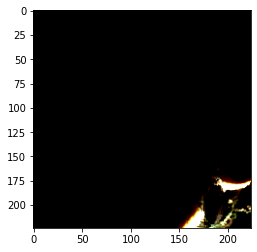

In [32]:
# Print image with plt from tensor

rgb_1_transposed = tf.transpose(rgb_1, perm=[1,2,0])

plt.imshow(rgb_1_transposed, vmin=0, vmax=255)
#plt.show()

In [21]:
show(src.read([3,2,1]), adjust=True)

<AxesSubplot:>

In [49]:
src_riox = rioxarray.open_rasterio("/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei/DatasetAfricaPoverty/TenYears/Geo0/0000000224-0000020384.tif")
print(src_riox)

<xarray.DataArray (band: 80, y: 224, x: 224)>
[4014080 values with dtype=float32]
Coordinates:
  * band         (band) int64 1 2 3 4 5 6 7 8 9 ... 72 73 74 75 76 77 78 79 80
  * x            (x) float64 -5.533 -5.532 -5.532 ... -5.473 -5.473 -5.472
  * y            (y) float64 35.95 35.95 35.95 35.95 ... 35.89 35.89 35.89 35.89
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    long_name:     ('0_BLUE', '0_GREEN', '0_RED', '0_SWIR1', '0_SWIR2', '0_TE...


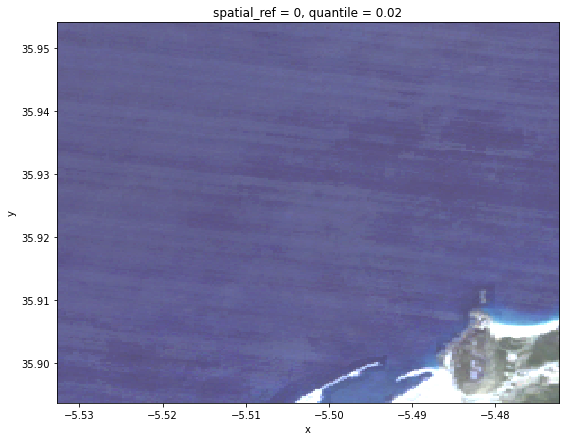

In [57]:
year_index = 7
src_riox.sel(band=[3+8*year_index, 2+8*year_index, 1+8*year_index]).plot.imshow(figsize=(9,7),
                     vmin=src_riox.quantile(0.02),
                     vmax=src_riox.quantile(0.98))


In [ ]:
# CREATE DATASET

In [11]:
src = rio.open("/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei/DatasetAfricaPoverty/TenYears/Geo0/0000000224-0000020384.tif")
image_numpy = src.read()
#image = tf.convert_to_tensor(image_numpy, dtype=tf.float32)
image_tensor = torch.from_numpy(image_numpy)

In [39]:
print(src.crs)

EPSG:4326


In [29]:
image_tensor = image_tensor[-8:]
image_tensor.size()
image_tensor = image_tensor.permute(2,0,1)
image_tensor_rgb = image_tensor[]
#show(image_tensor, adjust=True)

In [12]:
from torch.utils.data import Dataset
#from itertools import chain
#from PIL import Image
import os
#import glob
from matplotlib import pyplot as plt
from torchvision.transforms import *
from torch.utils.data import DataLoader

#countries = sorted([os.path.basename(path) for path in glob.glob("/tmp/compressed_dataset/*")])
#country_to_class = {k: v for i, country in enumerate(countries) for k, v in [(country, i), (i, country)]}
image_path = "/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei/DatasetAfricaPoverty/TenYears/Geo0/"
images = ["0000000224-0000020384.tif", "0000001120-0000018592.tif"]

class SSLDataset(Dataset):
  
  def __init__(self, transform=None):
    self.transform = transform
    self.samples = [os.path.join(image_path, image) for image in images]
    #if len(self.samples) != 49997:
      #raise ValueError(f"Unexpected number of samples")
   
    # Return last composite from each image
  def __getitem__(self, index):
    path = self.samples[index]
    img = rio.open(path).read()
    #img = torch.from_numpy(img)
    if self.transform is not None:
      img = self.transform(img)
    return img, label
  
  def __len__(self):
    return len(self.samples)


/cephyr/users/benvin/Alvis/.local/lib/python3.8/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: /cephyr/users/benvin/Alvis/.local/lib/python3.8/site-packages/torchvision/image.so: undefined symbol: _ZNK3c106IValue23reportToTensorTypeErrorEv
  warn(f"Failed to load image Python extension: {e}")


In [13]:
transform = Compose([
    #Resize((224,224)),
    ColorJitter(),
    ToTensor(),
    #Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

dataset = SSLDataset(transform)
dataset

In [2]:
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)
#for data, label in dataloader:
    
    
for test_images, test_labels in dataloader:  
    sample_image = test_images[0]    # Reshape them according to your needs.
    sample_label = test_labels[0]
sample_image

NameError: name 'DataLoader' is not defined

In [37]:
xarray = rioxarray.open_rasterio("/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei/DatasetAfricaPoverty/TenYears/Geo0/0000000224-0000020384.tif")
xarray

<xarray.DataArray (band: 80, y: 224, x: 224)>
[4014080 values with dtype=float32]
Coordinates:
  * band         (band) int64 1 2 3 4 5 6 7 8 9 ... 72 73 74 75 76 77 78 79 80
  * x            (x) float64 -5.533 -5.532 -5.532 ... -5.473 -5.473 -5.472
  * y            (y) float64 35.95 35.95 35.95 35.95 ... 35.89 35.89 35.89 35.89
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    long_name:     ('0_BLUE', '0_GREEN', '0_RED', '0_SWIR1', '0_SWIR2', '0_TE...

In [5]:
# Transform tiff

src = rio.open("/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei/DatasetAfricaPoverty/TenYears/Geo0/0000000224-0000020384.tif")
image_numpy = src.read()
#image = tf.convert_to_tensor(image_numpy, dtype=tf.float32)
image_tensor = torch.from_numpy(image_numpy)

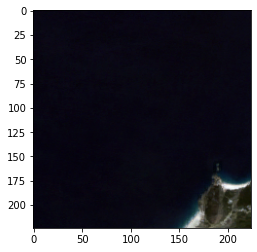

<AxesSubplot:>

In [8]:
show(src.read([3,2,1]), adjust=True)

In [10]:
src.read()

array([[[-0.48655346, -0.48797682, -0.44812265, ..., -0.3712611 ,
         -0.3854947 , -0.45239276],
        [-0.54064125, -0.48940018, -0.4267722 , ..., -0.382648  ,
         -0.43673575, -0.4466993 ],
        [-0.50932723, -0.47374317, -0.47374317, ..., -0.4267722 ,
         -0.3940349 , -0.36129755],
        ...,
        [-0.5079039 , -0.4353124 , -0.5335244 , ..., -0.6701672 ,
         -0.6644738 , -0.6559336 ],
        [-0.49936372, -0.51786745, -0.5306777 , ..., -0.63031304,
         -0.72994846, -0.70717466],
        [-0.4723198 , -0.48228335, -0.48797682, ..., -0.5904589 ,
         -0.57053185, -0.74418205]],

       [[-1.0823958 , -1.0636691 , -1.0991511 , ..., -0.9976332 ,
         -1.0439569 , -1.0124173 ],
        [-1.048885  , -1.0478994 , -1.048885  , ..., -1.0124173 ,
         -1.0419858 , -1.0272015 ],
        [-1.0902807 , -1.0341008 , -1.0341008 , ..., -1.0124173 ,
         -1.0272015 , -1.0124173 ],
        ...,
        [-1.0419858 , -1.0410001 , -1.0222734 , ..., -

In [16]:
import os, csv

f=open("image_paths_geo7.csv",'w')
w=csv.writer(f, delimiter='\t')
for path, dirs, files in os.walk("/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei/DatasetAfricaPoverty/TenYears/Geo7"):
    for filename in files:
        w.writerow(["/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei/DatasetAfricaPoverty/TenYears/Geo7" + filename])

In [22]:
os.path.join(path, filename)

'/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei/DatasetAfricaPoverty/TenYears/Geo7/0000000672-0000000224.tif'

In [26]:
import os, csv

f=open("image_paths_geo7.csv",'w')
w=csv.writer(f, delimiter='\t')
for path, dirs, files in os.walk("/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei/DatasetAfricaPoverty/TenYears/Geo7"):
    for directory in dirs:
        dir_path = os.path.join(path, directory)
        for path_, dirs_, files_ in os.walk(os.path.join(path, directory)):
            w.writerow(os.path.join(dir_path, filename))

In [5]:
# self.transforms = transform
import pandas as pd
import numpy as np
# Read the csv file
data_info = pd.read_csv("/cephyr/NOBACKUP/groups/globalpoverty1/JesperBenjamin/geography-aware-ssl/csvs/test.csv", header=0)
# First column contains the image paths
image_arr = np.asarray(data_info)
# Second column is the labels
#self.label_arr = np.asarray(self.data_info.iloc[:, 0])
# Calculate len
data_len = len(data_info.index)

In [18]:
data_info.to_numpy()[2][0]
image_arr = [path[0] for path in data_info.to_numpy()]
arr

['/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei/DatasetAfricaPoverty/TenYears/Geo0/0000012768-0000011872.tif',
 '/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei/DatasetAfricaPoverty/TenYears/Geo0/0000015456-0000011424.tif',
 '/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei/DatasetAfricaPoverty/TenYears/Geo0/0000001344-0000019712.tif',
 '/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei/DatasetAfricaPoverty/TenYears/Geo0/0000016800-0000025312.tif',
 '/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei/DatasetAfricaPoverty/TenYears/Geo0/0000006496-0000020160.tif',
 '/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei/DatasetAfricaPoverty/TenYears/Geo0/0000004928-0000021280.tif',
 '/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei/DatasetAfricaPoverty/TenYears/Geo0/0000008288-0000022624.tif',
 '/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei/DatasetAfricaPoverty/TenYears/Geo0/0000004032-0000037632.tif',
 '/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei/DatasetAfricaPoverty/TenYears/Geo0/0000015232-000001411